In [3]:
import torch
from torch import nn, optim
from sklearn.datasets import load_iris
iris = load_iris()

#irisは(0,1,2)の3クラスの分類問題なのでここでは
#(0,1)の2クラス分のデータだけを使用する
#本来は訓練用とテスト用に分けるべきだがここでは省略
X = iris.data[:100]
y = iris.target[:100]

#NumpyのndarrayをPyTorchのTensorに変換
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

In [4]:
net = nn.Linear(4, 1)

#シグモイド関数を作用させ，２クラス分類の，
#クロスエントロピーを計算する関数
loss_fn = nn.BCEWithLogitsLoss()

#SGD（少し大きめの学習率）
optimizer = optim.SGD(net.parameters(), lr=0.25)

In [5]:
#損失関数のログ
losses = []

#100回イテレーションを回す
for epoc in range(100):
    #前回のbackwardメソッドで計算された勾配の値を削除
    optimizer.zero_grad()

    #線形モデルでyの予測値を計算
    y_pred = net(X)

    #MSE lossとwによる微分を計算
    loss = loss_fn(y_pred.view_as(y), y)
    loss.backward()

    #勾配を更新する
    optimizer.step()

    #収束確認のためにlossを記録しておく
    losses.append(loss.item())

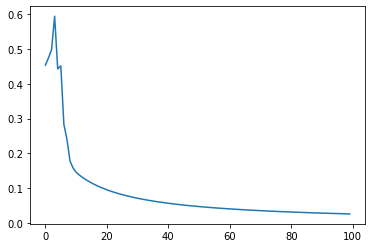

In [6]:
from matplotlib import pyplot as plt
plt.plot(losses)

In [7]:
#線形結合の結果
h = net(X)

#シグモイド関数を作用させた結果はy=1の確率を表す
prob = nn.functional.sigmoid(h)

#確率が0.5以上のものをクラス1と予想し，それ以外を0とする
#PyTorchにはBool型がないので対応する型として，ByteTensorが出力される
y_pred = prob > 0.5

#予測結果の確認（yはFloatTensorなのでByteTensorに変換してから比較する）
(y.byte() == y_pred.view_as(y)).sum().item()

100

In [13]:
from sklearn.datasets import load_digits
digits = load_digits()

X = digits.data
y = digits.target

X = torch.tensor(X, dtype=torch.float32)
#CrossEntropyLoss関数はyとしてint64型のTensorを受け釣るので注意
y = torch.tensor(y, dtype=torch.int64)

#出力は10(クラス数)次元
net = nn.Linear(X.size()[1], 10)

print(net)

#ソフトマックスクロスエントロピー
loss_fn = nn.CrossEntropyLoss()

#SGD
optimizer = optim.SGD(net.parameters(), lr=0.01)

Linear(in_features=64, out_features=10, bias=True)


In [15]:
#損失関数のログ
losses = []

#100回のイテレーションを回す
for epoc in range(100):
    #前回のbackwardメソッドで計算された勾配の値を削除
    optimizer.zero_grad()

    #線形モデルでyの予測値を計算
    y_pred = net(X)

    #MSE lossとwによる微分を計算
    loss = loss_fn(y_pred, y)
    loss.backward()

    #勾配を更新する
    optimizer.step()

    #収束確認のためにlossを記録しておく
    losses.append(loss.item())

In [18]:
#torch.maxは集計軸を指定すると，最大値のほかにその位置も返す
_, y_pred = torch.max(net(X), 1)

#正解値を計算する
(y_pred == y).sum().item() / len(y)

0.9382303839732888